In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, rcParams
import time
from numpy.linalg import qr, svd
import os

from PIL import Image

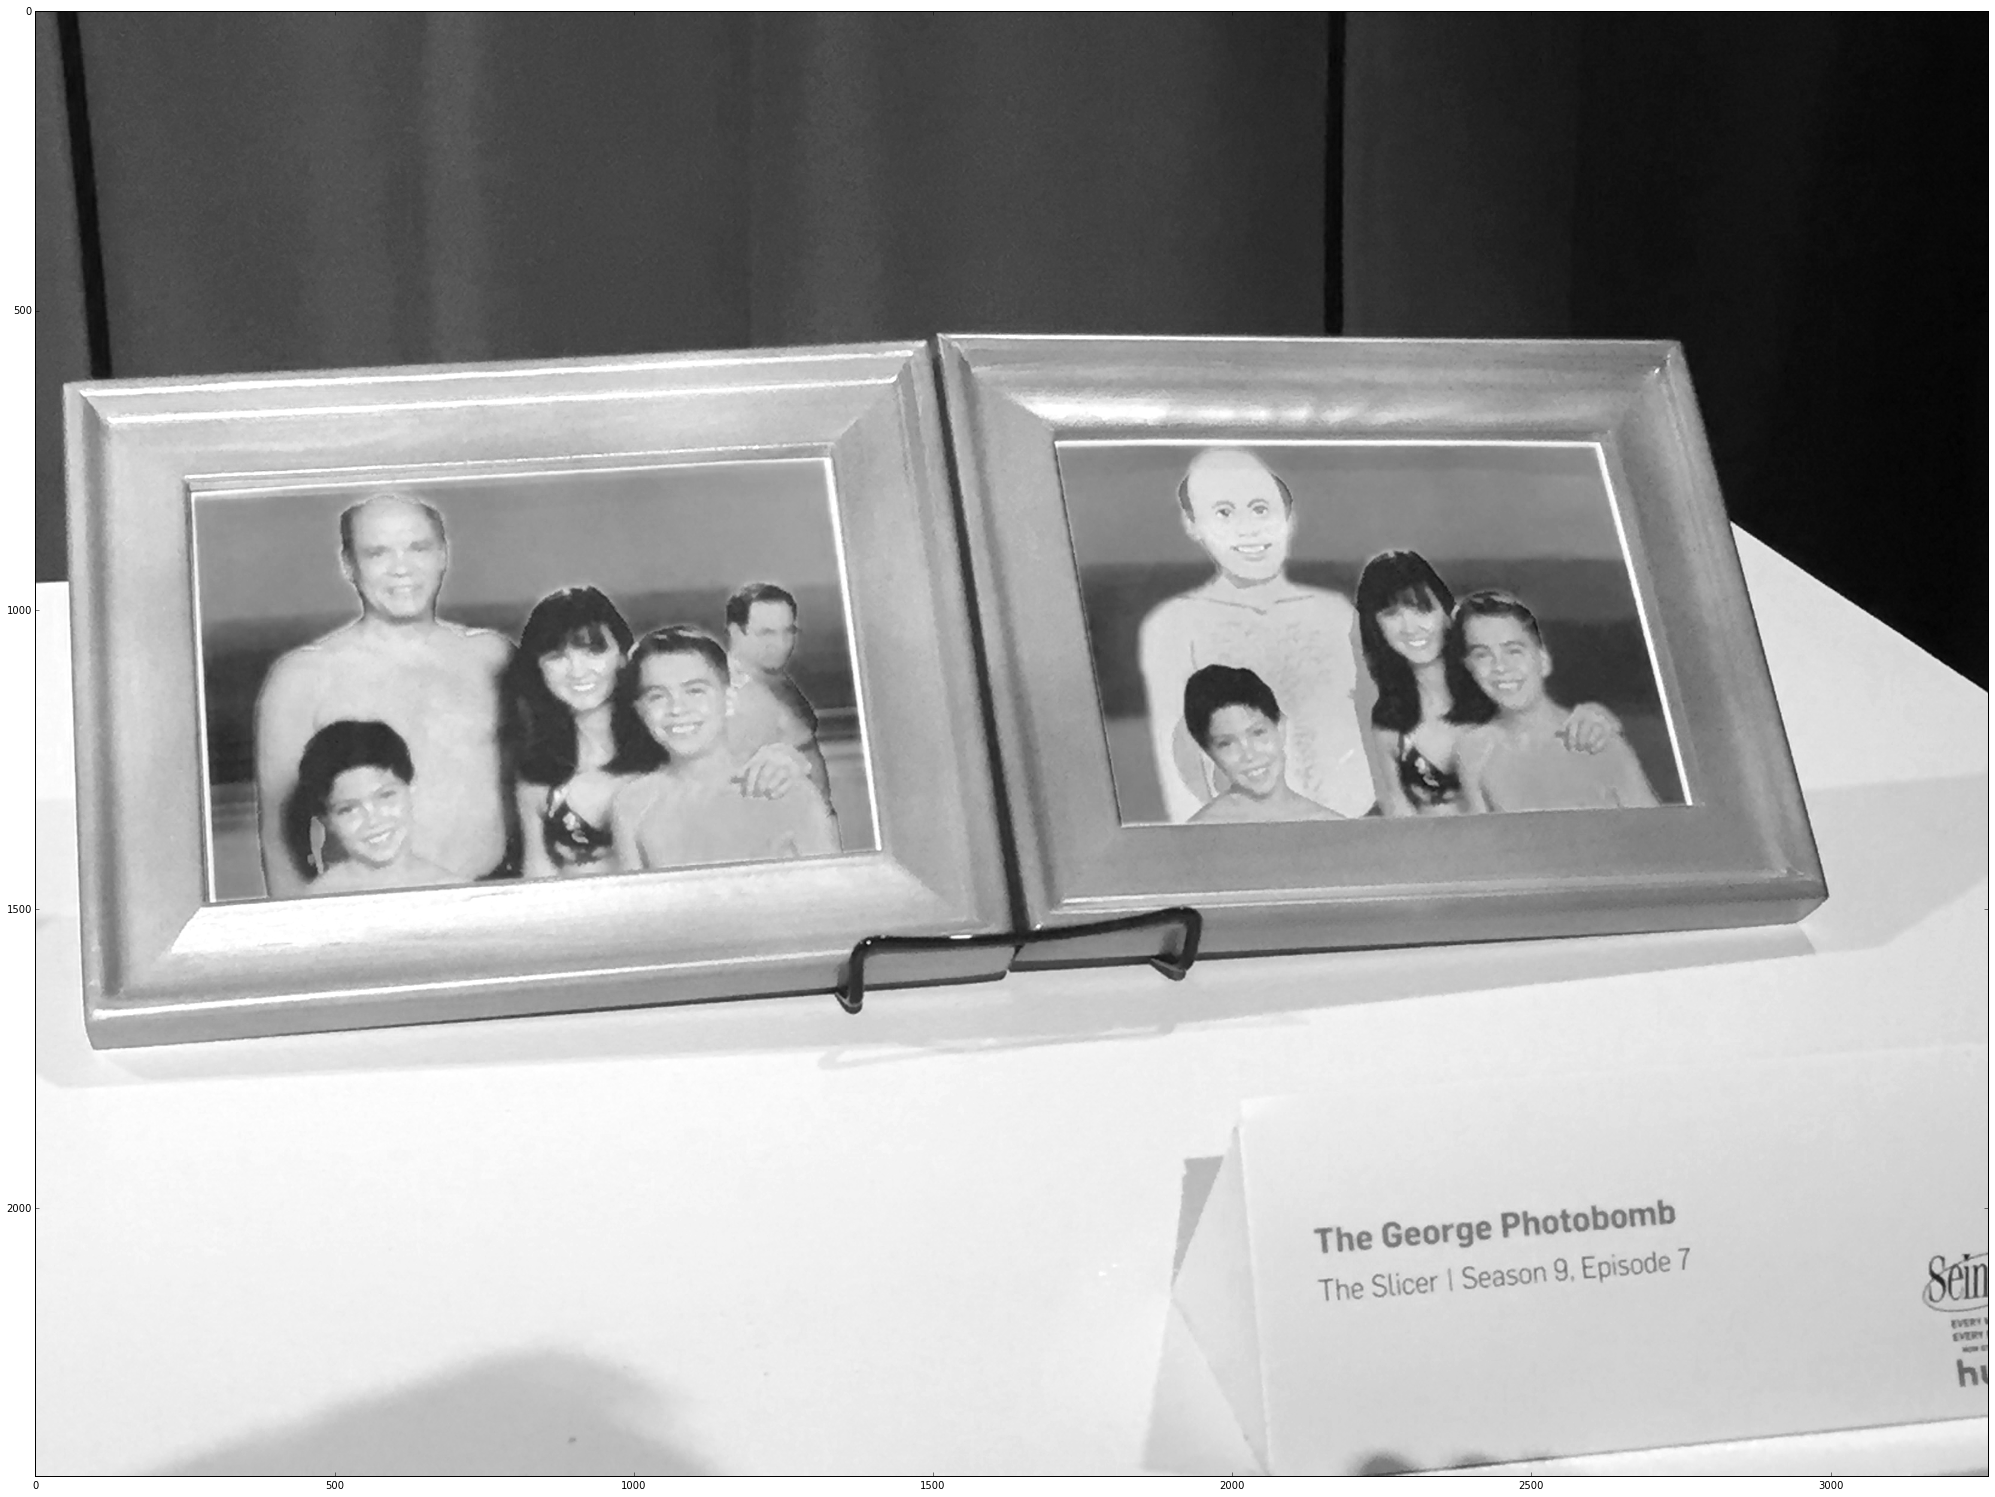

In [3]:
img = Image.open('/Users/ilanman/photo_bomb_color.JPG')
plt.figure(figsize=(35, 35))
imgmat = np.array(list(img.getdata(band=0)), float)
imgmat.shape = (img.size[1], img.size[0])
imgmat = np.matrix(imgmat)
plt.imshow(imgmat, cmap='gray');
plt.savefig('photo_bomb_bw.png')

In [4]:
statinfo = os.path.getsize('photo_bomb_bw.png')
svd_size = statinfo/1000

In [5]:
np.shape(imgmat)

(2448, 3264)

In [6]:
svd_size

1641

In [7]:
start = time.time()
U, sigma, V = svd(imgmat)
end = time.time()
svd_time = end - start

In [228]:
def rsvd_alg(k, p , A, iters, use_power):
    """
    Implements randomized SVD algorithm
    Matrix A is n * m where m <= n. Otherwise, transpose A.
    Set Omega's dimensions to be min(m,n)
    One enhancement is the use of a power iteration - this significantly improves accuracy up to values 3 or 4.
    """
    
    # this ensures that m <= n
    if(A.shape[0] > A.shape[1]):
        A = A.T
    
    Omega = np.random.randn(A.shape[0], k + p)
    
    iters = iters * use_power  # set to 0 if False, otherwise stays the same
    
    for i in range(iters):
        Omega = np.dot(A,np.dot(A.T,Omega))
    
    Q, R = qr(Omega)
    B = np.dot(Q.T,A)
    U,S,V = svd(B)
    U = np.dot(Q,U)
    
    return U,S,V

In [259]:
start = time.time()
U_, S_, V_ = rsvd_alg(500,15,imgmat,4,True)
end = time.time()
rsvd_time = end - start

In [1]:
print svd_time

NameError: name 'svd_time' is not defined

In [16]:
def animate(x):

    x = max(5, (8 - x) * 15)
    reconstimg = np.matrix(U[:, :x]) * np.diag(sigma[:x]) * np.matrix(V[:x, :])
    plt.imshow(reconstimg, cmap='gray')
    plt.savefig('photo_bomb_bw_{}.png'.format(x))
    statinfo = os.path.getsize('photo_bomb_bw_{}.png'.format(x))
    title = "Rank-{} approximation.    Image size: {}KB\n".format(x,statinfo/1000)
    plt.title(title,size=42)

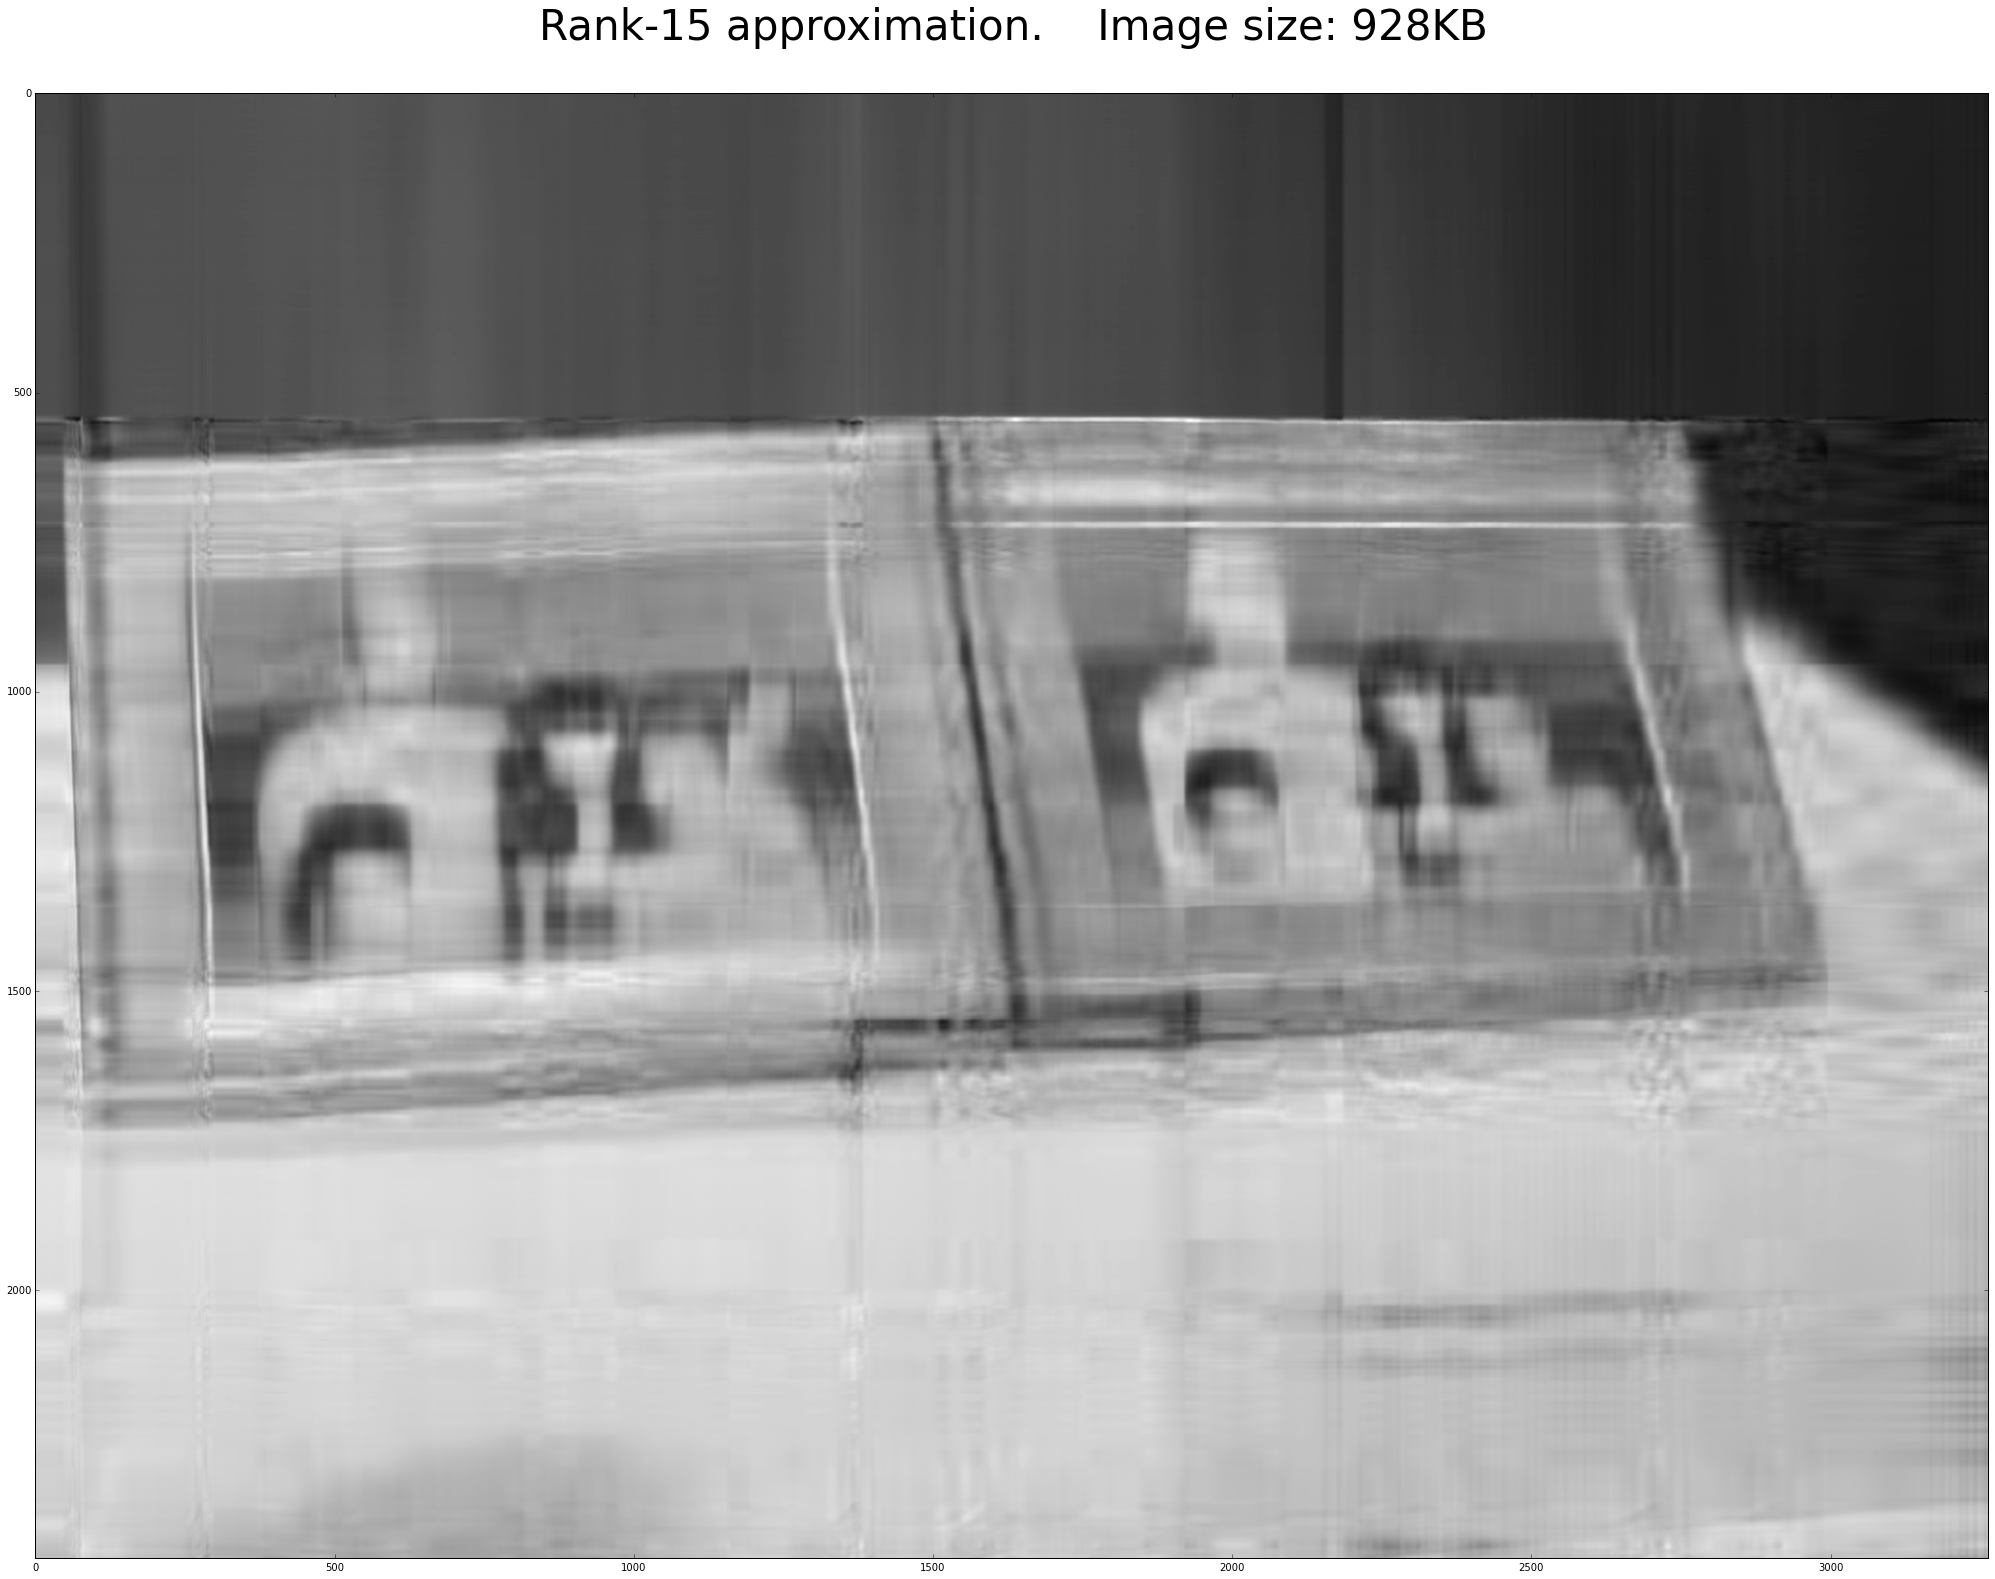

In [17]:
fig = plt.figure(figsize=(35,35))
anim = animation.FuncAnimation(fig, animate, frames=8, interval=2, blit=False)
anim.save('photo_bomb_compression.gif', writer='imagemagick', fps=1)
plt.show()

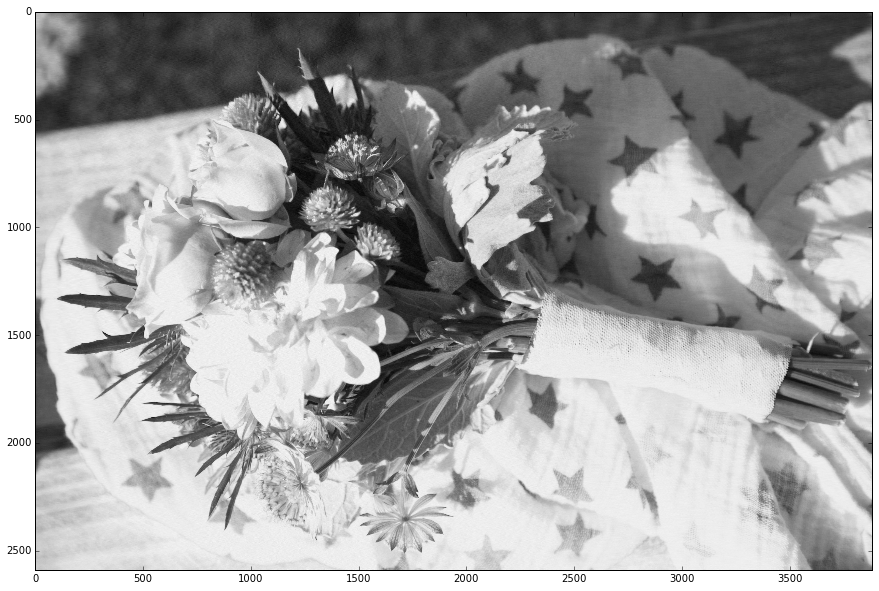

530


In [275]:
reconstimg = np.matrix(U_[:,:]) * np.diag(S_[:]) * np.matrix(V_[:2065,:])
plt.figure(figsize=(15,15))
plt.imshow(reconstimg, cmap='gray')
plt.savefig('flowers_rsvd.png')
plt.show()
statinfo = os.path.getsize('flowers_rsvd.png')
print statinfo/1000

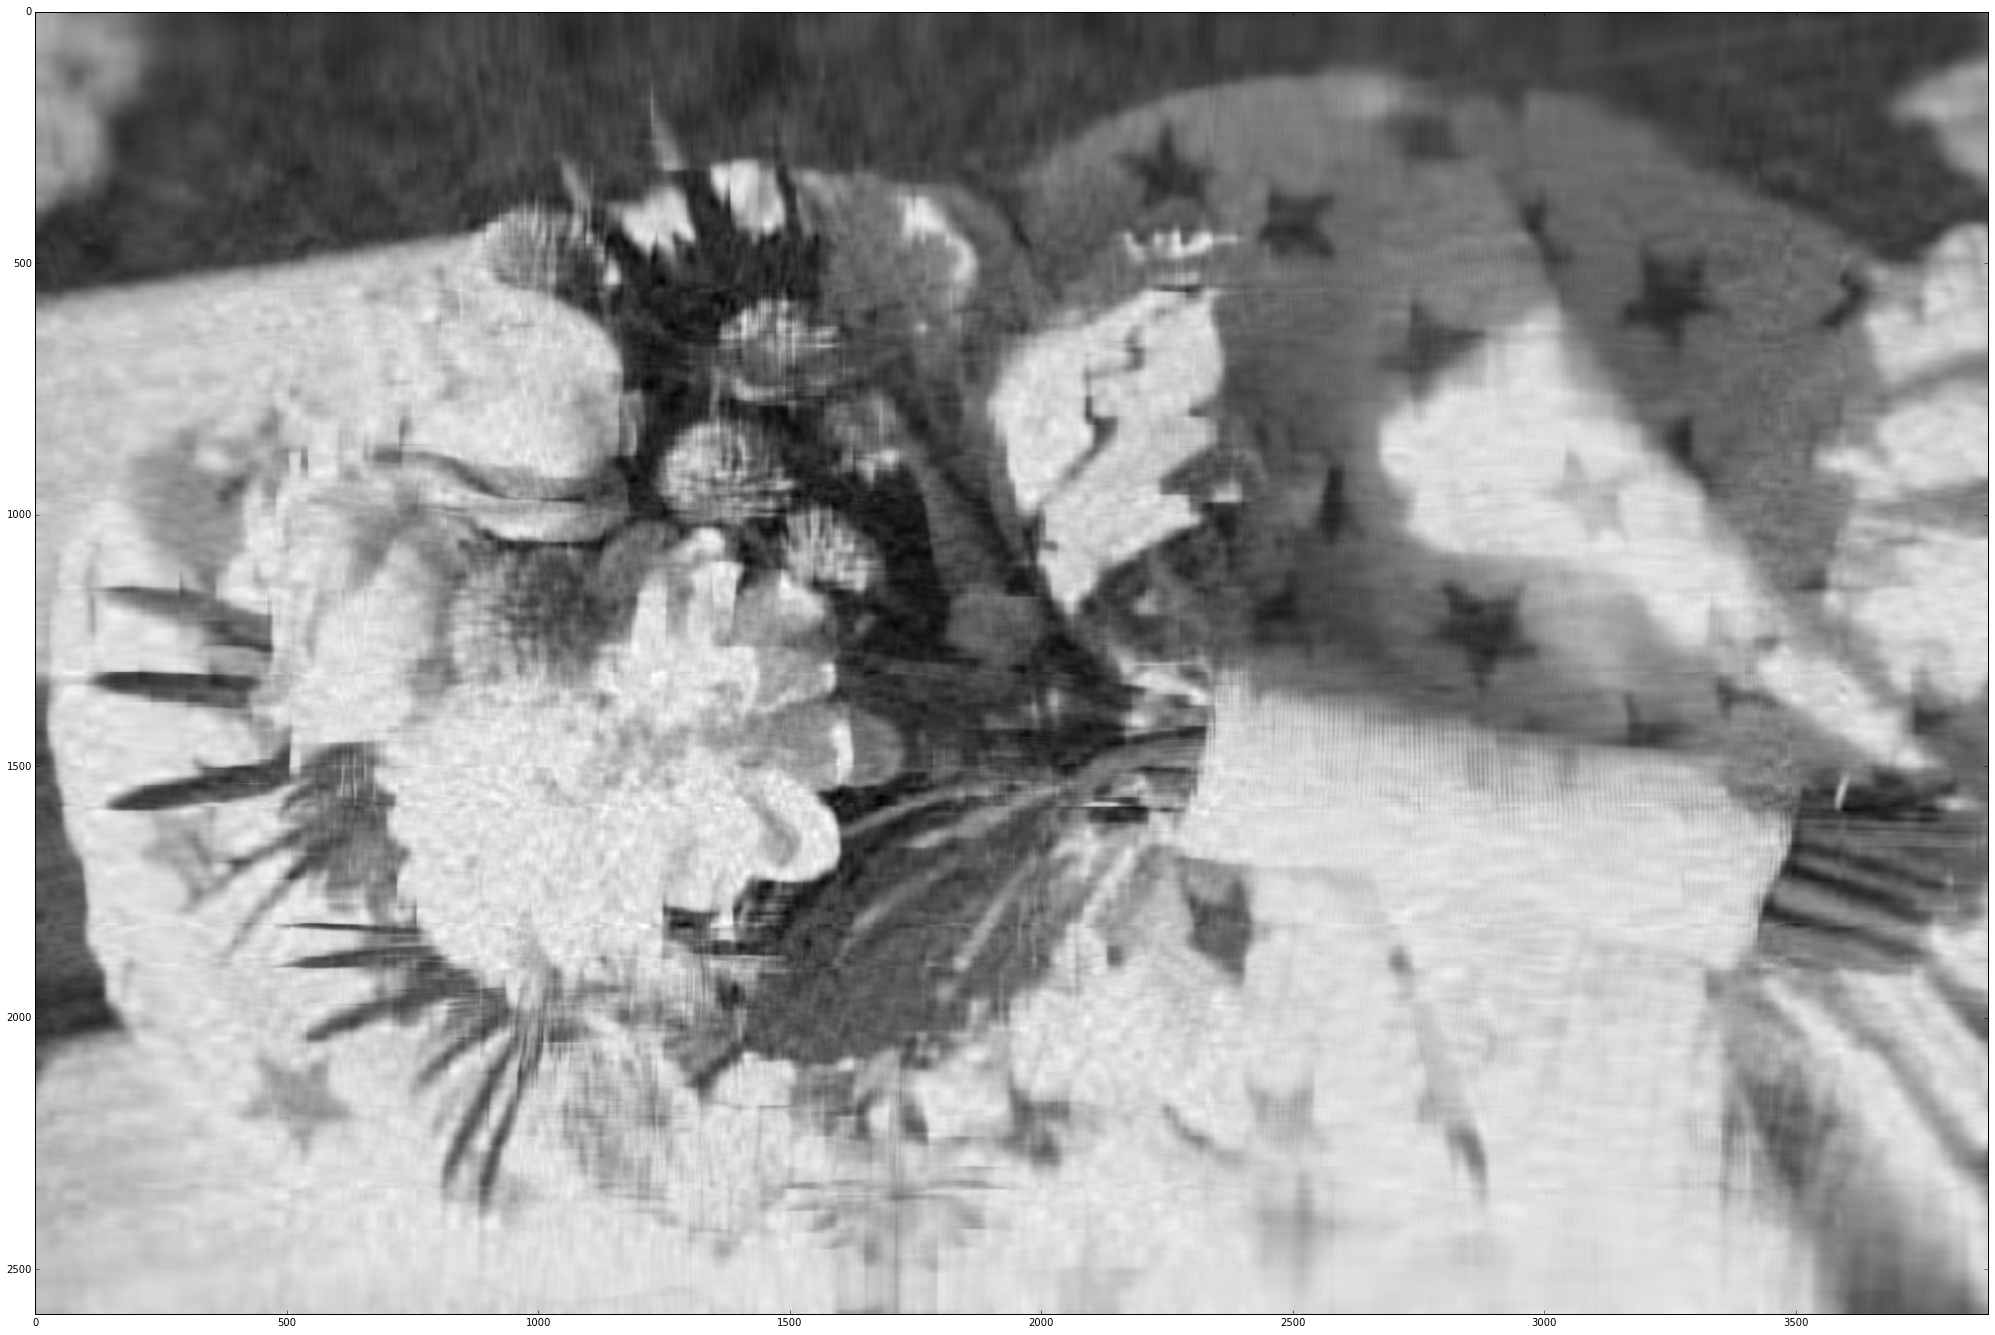

1335


In [270]:
reconstimg = np.matrix(U_[:,:50]) * np.diag(S_[:50]) * np.matrix(V_[:50,:])
plt.figure(figsize=(35,35))
plt.imshow(reconstimg, cmap='gray')
plt.savefig('flowers_rsvd.png')
plt.show()
statinfo = os.path.getsize('flowers_rsvd.png')
print statinfo/1000